<a href="https://colab.research.google.com/github/22224516GurungYash/Group13EDA/blob/main/Exploratory_Data_Analysis_(EDA)_Group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Testing the URL
test_url = 'https://www.fotmob.com/api/leagues?id=47&ccode3=JPN&season=2017%2F2018'

data_1 = requests.get(url = test_url).json()


In [3]:
#Extracting the data.
df_1 = pd.DataFrame(data_1['table'][0]['data']['table']['all'])
df_1.head()

,name,shortName,id,pageUrl,deduction,ongoing,played,wins,draws,losses,scoresStr,goalConDiff,pts,idx,qualColor
0,Manchester City,Man City,8456,/teams/8456/overview/manchester-city,None,None,38,32,4,2,106-27,79,100,1,#2AD572
1,Manchester United,Man United,10260,/teams/10260/overview/manchester-united,None,None,38,25,6,7,68-28,40,81,2,#2AD572
2,Tottenham Hotspur,Tottenham,8586,/teams/8586/overview/tottenham-hotspur,None,None,38,23,8,7,74-36,38,77,3,#2AD572
3,Liverpool,Liverpool,8650,/teams/8650/overview/liverpool,None,None,38,21,12,5,84-38,46,75,4,#2AD572
4,Chelsea,Chelsea,8455,/teams/8455/overview/chelsea,None,None,38,21,7,10,62-38,24,70,5,#0046A7


In [4]:
#Extracting the data.
df_2 = pd.DataFrame(data_1['table'][0]['data']['table']['home'])
df_2.head()

,name,shortName,id,pageUrl,deduction,ongoing,played,wins,draws,losses,scoresStr,goalConDiff,pts,idx,qualColor
0,Manchester City,Man City,8456,/teams/8456/overview/manchester-city,None,None,19,16,2,1,61-14,47,50,1,#2AD572
1,Arsenal,Arsenal,9825,/teams/9825/overview/arsenal,None,None,19,15,2,2,54-20,34,47,2,#2AD572
2,Manchester United,Man United,10260,/teams/10260/overview/manchester-united,None,None,19,15,2,2,38-9,29,47,3,#2AD572
3,Liverpool,Liverpool,8650,/teams/8650/overview/liverpool,None,None,19,12,7,0,45-10,35,43,4,#2AD572
4,Tottenham Hotspur,Tottenham,8586,/teams/8586/overview/tottenham-hotspur,None,None,19,13,4,2,40-16,24,43,5,#0046A7


In [5]:
#Extracting the data.
df_3 = pd.DataFrame(data_1['table'][0]['data']['table']['away'])
df_3.head()

,name,shortName,id,pageUrl,deduction,ongoing,played,wins,draws,losses,scoresStr,goalConDiff,pts,idx,qualColor
0,Manchester City,Man City,8456,/teams/8456/overview/manchester-city,None,None,19,16,2,1,45-13,32,50,1,#2AD572
1,Tottenham Hotspur,Tottenham,8586,/teams/8586/overview/tottenham-hotspur,None,None,19,10,4,5,34-20,14,34,2,#2AD572
2,Manchester United,Man United,10260,/teams/10260/overview/manchester-united,None,None,19,10,4,5,30-19,11,34,3,#2AD572
3,Chelsea,Chelsea,8455,/teams/8455/overview/chelsea,None,None,19,10,3,6,32-22,10,33,4,#2AD572
4,Liverpool,Liverpool,8650,/teams/8650/overview/liverpool,None,None,19,9,5,5,39-28,11,32,5,#0046A7


In [6]:
#Dropping the unnecessary columns from the data.
df_1 = df_1.drop(['name', 'id', 'pageUrl', 'deduction', 'ongoing', 'idx', 'qualColor'], axis = 1)
df_2 = df_2.drop(['name', 'id', 'pageUrl', 'deduction', 'ongoing', 'played', 'wins', 'losses', 'goalConDiff', 'pts', 'idx', 'qualColor'], axis = 1)
df_3 = df_3.drop(['name', 'id', 'pageUrl', 'deduction', 'ongoing', 'played', 'wins', 'losses', 'goalConDiff', 'pts', 'idx', 'qualColor'], axis = 1)

In [7]:
df_1.head()

,shortName,played,wins,draws,losses,scoresStr,goalConDiff,pts
0,Man City,38,32,4,2,106-27,79,100
1,Man United,38,25,6,7,68-28,40,81
2,Tottenham,38,23,8,7,74-36,38,77
3,Liverpool,38,21,12,5,84-38,46,75
4,Chelsea,38,21,7,10,62-38,24,70


In [8]:
df_2.head()

,shortName,draws,scoresStr
0,Man City,2,61-14
1,Arsenal,2,54-20
2,Man United,2,38-9
3,Liverpool,7,45-10
4,Tottenham,4,40-16


In [9]:
df_3.head()

,shortName,draws,scoresStr
0,Man City,2,45-13
1,Tottenham,4,34-20
2,Man United,4,30-19
3,Chelsea,3,32-22
4,Liverpool,5,39-28


In [10]:
#Renaming the columns to make it look like the original in the website.
df_1.columns = ["Name", "PL", "W", "D", "L", "+/-", "GD", "PTS"]
df_2.columns = ["Name","Draws_Home", "+/-"]
df_3.columns = ["Name", "Draws_Away", "+/-"]

In [11]:
df_1.head()

,Name,PL,W,D,L,+/-,GD,PTS
0,Man City,38,32,4,2,106-27,79,100
1,Man United,38,25,6,7,68-28,40,81
2,Tottenham,38,23,8,7,74-36,38,77
3,Liverpool,38,21,12,5,84-38,46,75
4,Chelsea,38,21,7,10,62-38,24,70


In [12]:
# Here we splitted the '+/-' column in to two which represents the
# Goals scored - Goals Conceded into their new columns.
df_1[['Goals_Scored', 'Goals_Conceded']] = df_1['+/-'].str.split('-', expand=True)

df_1['Goals_Scored'] = df_1['Goals_Scored'].astype(int)
df_1['Goals_Conceded'] = df_1['Goals_Conceded'].astype(int)

df_1 = df_1.drop(columns = ['+/-'])

#We did the same for the Home Data.
df_2[['Goals_Scored_Home', 'Goals_Conceded_Home']] = df_2['+/-'].str.split('-', expand=True)

df_2['Goals_Scored_Home'] = df_2['Goals_Scored_Home'].astype(int)
df_2['Goals_Conceded_Home'] = df_2['Goals_Conceded_Home'].astype(int)

df_2 = df_2.drop(columns = ['+/-'])

#Did the same for Away Data.
df_3[['Goals_Scored_Away', 'Goals_Conceded_Away']] = df_3['+/-'].str.split('-', expand=True)

df_3['Goals_Scored_Away'] = df_3['Goals_Scored_Away'].astype(int)
df_3['Goals_Conceded_Away'] = df_3['Goals_Conceded_Away'].astype(int)

df_3 = df_3.drop(columns = ['+/-'])

#After splitting the columns the newly formed columns has value type str
#So we changed the value type of each columns from Str ti Int.
#Then we dropped the '+/-' from all three dataframe.

In [13]:
df_1.head()

,Name,PL,W,D,L,GD,PTS,Goals_Scored,Goals_Conceded
0,Man City,38,32,4,2,79,100,106,27
1,Man United,38,25,6,7,40,81,68,28
2,Tottenham,38,23,8,7,38,77,74,36
3,Liverpool,38,21,12,5,46,75,84,38
4,Chelsea,38,21,7,10,24,70,62,38


In [14]:
df_2.head()

,Name,Draws_Home,Goals_Scored_Home,Goals_Conceded_Home
0,Man City,2,61,14
1,Arsenal,2,54,20
2,Man United,2,38,9
3,Liverpool,7,45,10
4,Tottenham,4,40,16


In [15]:
df_3.head()

,Name,Draws_Away,Goals_Scored_Away,Goals_Conceded_Away
0,Man City,2,45,13
1,Tottenham,4,34,20
2,Man United,4,30,19
3,Chelsea,3,32,22
4,Liverpool,5,39,28


In [16]:
# Then we merged the 3 dataframes and made a single dataframe called merged_data
# which becomes our data for further analysis.
merged_data = pd.merge(df_1, df_2, on=['Name'])
merged_data = pd.merge(merged_data, df_3, on=['Name'])
merged_data.head()

,Name,PL,W,D,L,GD,PTS,Goals_Scored,Goals_Conceded,Draws_Home,Goals_Scored_Home,Goals_Conceded_Home,Draws_Away,Goals_Scored_Away,Goals_Conceded_Away
0,Man City,38,32,4,2,79,100,106,27,2,61,14,2,45,13
1,Man United,38,25,6,7,40,81,68,28,2,38,9,4,30,19
2,Tottenham,38,23,8,7,38,77,74,36,4,40,16,4,34,20
3,Liverpool,38,21,12,5,46,75,84,38,7,45,10,5,39,28
4,Chelsea,38,21,7,10,24,70,62,38,4,30,16,3,32,22


In [17]:
#Checking for missing values in the dataframe.
merged_data.isnull().sum()

,0
Name,0
PL,0
W,0
D,0
L,0
GD,0
PTS,0
Goals_Scored,0
Goals_Conceded,0
Draws_Home,0


In [18]:
# looking at summary statistics of the numerical columns in the merged_data DataFrame.
merged_data.describe()

,PL,W,D,L,GD,PTS,Goals_Scored,Goals_Conceded,Draws_Home,Goals_Scored_Home,Goals_Conceded_Home,Draws_Away,Goals_Scored_Away,Goals_Conceded_Away
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.0,14.050000,9.900000,14.050000,0.000000,52.050000,50.900000,50.900000,4.950000,29.100000,21.800000,4.950000,21.800000,29.100000
std,0.0,7.067159,2.826566,5.286278,30.869846,19.170907,20.968397,12.468487,1.932411,12.481144,6.645933,1.605091,10.060867,7.151739
min,38.0,6.000000,4.000000,2.000000,-33.000000,31.000000,28.000000,27.000000,2.000000,16.000000,9.000000,2.000000,10.000000,13.000000
25%,38.0,9.000000,8.000000,11.500000,-20.000000,39.250000,35.750000,38.750000,4.000000,20.750000,16.750000,4.000000,15.750000,25.750000
50%,38.0,11.500000,10.500000,16.000000,-12.000000,44.000000,44.500000,55.500000,5.000000,25.500000,23.000000,5.000000,18.500000,30.000000
75%,38.0,19.500000,12.000000,18.250000,23.250000,64.750000,63.500000,58.500000,6.000000,32.000000,26.250000,6.000000,30.250000,33.000000
max,38.0,32.000000,15.000000,21.000000,79.000000,100.000000,106.000000,68.000000,9.000000,61.000000,31.000000,8.000000,45.000000,42.000000


In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 20 non-null     object
 1   PL                   20 non-null     int64 
 2   W                    20 non-null     int64 
 3   D                    20 non-null     int64 
 4   L                    20 non-null     int64 
 5   GD                   20 non-null     int64 
 6   PTS                  20 non-null     int64 
 7   Goals_Scored         20 non-null     int64 
 8   Goals_Conceded       20 non-null     int64 
 9   Draws_Home           20 non-null     int64 
 10  Goals_Scored_Home    20 non-null     int64 
 11  Goals_Conceded_Home  20 non-null     int64 
 12  Draws_Away           20 non-null     int64 
 13  Goals_Scored_Away    20 non-null     int64 
 14  Goals_Conceded_Away  20 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.5+ KB


In [20]:
merged_data.shape

(20, 15)

# Hypothesis: 1
### Top five teams have better attacking than bottom five teams. ###
Question 1: Do top five teams score more goals than bottom five teams?

Null Hypothesis (H0): There is no significant difference in the number of goals
scored by the top five teams compared to the bottom five teams.

Alternative Hypothesis (H1): The top five teams score significantly more goals than the bottom five teams.

In [21]:
sns.set(style="whitegrid")

top_teams = merged_data.nlargest(5, 'PTS')
bottom_teams = merged_data.nsmallest(5, 'PTS')

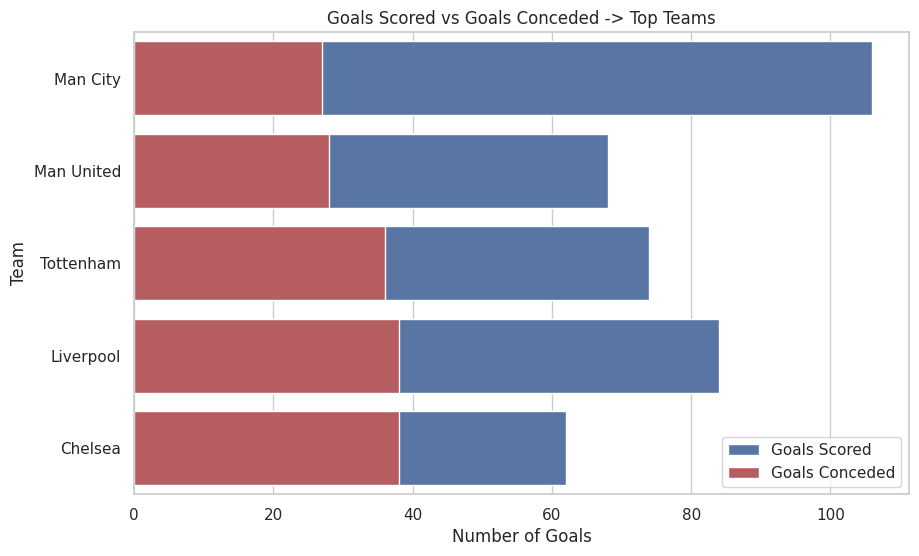

In [22]:
# Plot 1: Goals scored vs Goals conceded for top teams
plt.figure(figsize=(10, 6))
sns.barplot(x='Goals_Scored', y='Name', data=top_teams, label='Goals Scored', color='b')
sns.barplot(x='Goals_Conceded', y='Name', data=top_teams, label='Goals Conceded', color='r')
plt.title('Goals Scored vs Goals Conceded -> Top Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Team')
plt.legend()
plt.show()

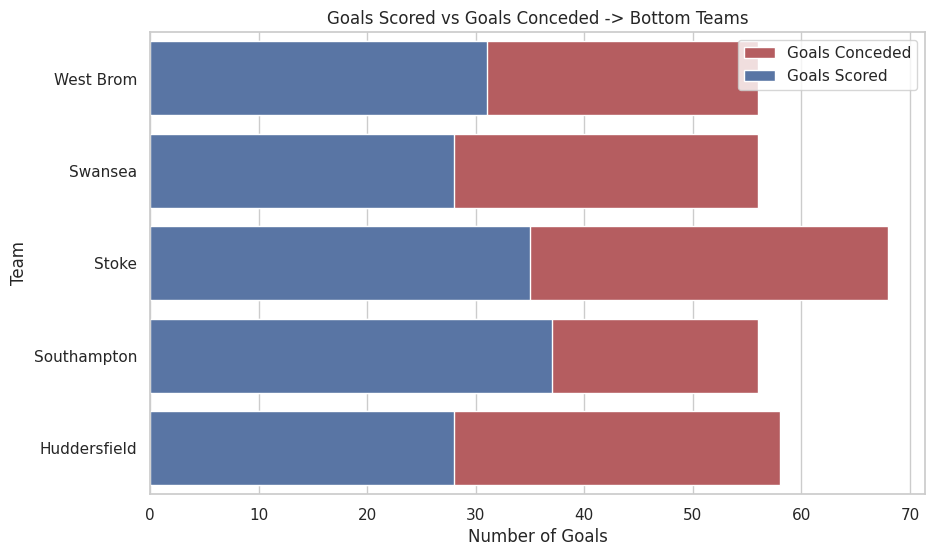

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Goals_Conceded', y='Name', data=bottom_teams, label='Goals Conceded', color='r')
sns.barplot(x='Goals_Scored', y='Name', data=bottom_teams, label='Goals Scored', color='b')
plt.title('Goals Scored vs Goals Conceded -> Bottom Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Team')
plt.legend()
plt.show()


In [24]:
from scipy import stats

top_goals = top_teams['Goals_Scored']
bottom_goals = bottom_teams['Goals_Scored']

correlation, p_value = stats.ttest_ind(top_goals, bottom_goals)
print(f"ttest correlation coefficient (Goals Scored, Top vs. Bottom): {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in goals scored is statistically significant.")
else:
    print("The difference in goals scored is not statistically significant.")


ttest correlation coefficient (Goals Scored, Top vs. Bottom): 5.931809596103181
P-value: 0.0003490285242457535
The difference in goals scored is statistically significant.


In [35]:
top_goals_concede = top_teams['Goals_Conceded']
bottom_goals_concede = bottom_teams['Goals_Conceded']

correlation, p_value = stats.ttest_ind(top_goals_concede, bottom_goals_concede)
print(f"ttest correlation coefficient (Goals Conceded, Top vs. Bottom): {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in goals conceded is statistically significant.")
else:
    print("The difference in goals conceded is not statistically significant.")

ttest correlation coefficient (Goals Conceded, Top vs. Bottom): -7.522830747540472
P-value: 6.77976432014433e-05
The difference in goals conceded is statistically significant.


- **Goals Scored**:
  - T-test correlation coefficient: 5.93
  - P-value: 0.0003
- **Goals Conceded**:
  - T-test correlation coefficient: -7.52
  - P-value: 6.78e-05

For both goals scored and goals conceded, the p-values are below the typical significance level of 0.05. This suggests that there is a statistically significant difference in the goals scored and conceded between the top and bottom teams. Since the correlation coefficients are positive for goals scored and negative for goals conceded, it indicates that top teams score more goals and concede fewer goals than bottom teams.

**Conclusion**: Reject the null hypothesis. There is significant evidence that top teams have better attacking and defending than bottom teams.

# Hypothesis: 2
### Teams tend to perform better in Home games than Away games. ###
Question 2: Do teams perform better at home than away?

Null Hypothesis (H0): Teams do not perform significantly better at home than away.

Alternative Hypothesis (H1): Teams perform significantly better at home than away.

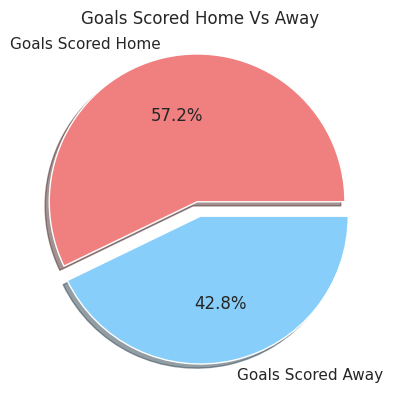

In [25]:
goals_home = merged_data['Goals_Scored_Home'].sum()
goals_away = merged_data['Goals_Scored_Away'].sum()

labels = ['Goals Scored Home', 'Goals Scored Away']
sizes = [goals_home, goals_away]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Goals Scored Home Vs Away')
plt.show()




In [26]:
home_goals = merged_data['Goals_Scored_Home']
away_goals = merged_data['Goals_Scored_Away']

correlation, p_value = stats.ttest_rel(home_goals, away_goals)
print(f"ttest correlation coefficient (Home vs. Away Goals Scored): {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in goals scored is statistically significant.")
else:
    print("The difference in goals scored is not statistically significant.")

ttest correlation coefficient (Home vs. Away Goals Scored): 3.7867493091016193
P-value: 0.0012469170419907249
The difference in goals scored is statistically significant.


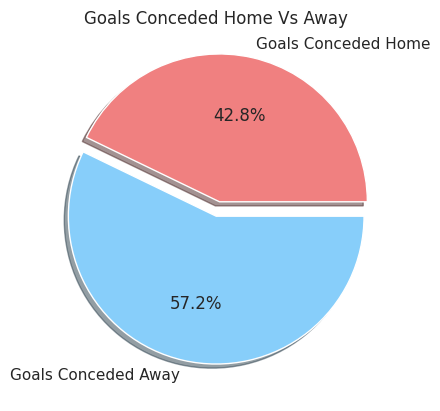

In [27]:
conceded_home = merged_data['Goals_Conceded_Home'].sum()
conceded_away = merged_data['Goals_Conceded_Away'].sum()

labels = ['Goals Conceded Home', 'Goals Conceded Away']
sizes = [conceded_home, conceded_away]
color = ['lightcoral','lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels = labels, colors=colors, shadow = True, autopct = '%1.1f%%')
plt.title('Goals Conceded Home Vs Away')
plt.show()

In [28]:
home_conceded = merged_data['Goals_Conceded_Home']
away_conceded = merged_data['Goals_Conceded_Away']

correlation, p_value = stats.ttest_rel(away_conceded, home_conceded)
print(f"ttest correlation coefficient (Home vs. Away Goals Conceded): {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in goals conceded is statistically significant.")
else:
    print("The difference in goals conceded is not statistically significant.")

ttest correlation coefficient (Home vs. Away Goals Conceded): 5.505051964024391
P-value: 2.606115058055847e-05
The difference in goals conceded is statistically significant.


- **Goals Scored**:
  - T-test correlation coefficient: 3.79
  - P-value: 0.0012
- **Goals Conceded**:
  - T-test correlation coefficient: 5.51
  - P-value: 2.61e-05

Both p-values are well below 0.05, suggesting significant differences in performance (in terms of goals scored and conceded) between home and away games. The positive coefficients indicate that teams perform better (score more and concede less) at home than away.

**Conclusion**: Reject the null hypothesis. There is significant evidence that teams perform better at home than away.



#Hypothesis 3
The location of the game does not significantly affect the likelihood of a draw.

Question 3: Does the location of the game (home vs. away) influence the likelihood of a draw?

**Null Hypothesis (H0):** The location of the game (home or away) does not significantly influence the likelihood of a draw.

**Alternative Hypothesis (H1):** The location of the game (home or away) significantly influences the likelihood of a draw.

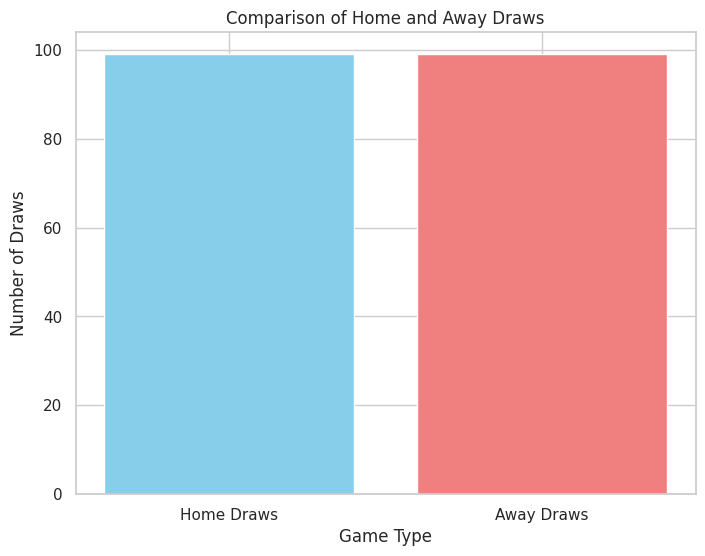

In [29]:
total_home_draws = merged_data['Draws_Home'].sum()
total_away_draws = merged_data['Draws_Away'].sum()

labels = ['Home Draws', 'Away Draws']
values = [total_home_draws, total_away_draws]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.xlabel('Game Type')
plt.ylabel('Number of Draws')
plt.title('Comparison of Home and Away Draws')
plt.show()


In [30]:
home_draws = merged_data['Draws_Home']
away_draws = merged_data['Draws_Away']

correlation, p_value = stats.ttest_rel(home_draws, away_draws)

print(f"ttest correlation coefficient (Home and Away  Draws): {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in draws is statistically significant.")
else:
    print("The difference in draws is not statistically significant.")

ttest correlation coefficient (Home and Away  Draws): 0.0
P-value: 1.0
The difference in draws is not statistically significant.


- **T-test correlation coefficient**: 0.0
- **P-value**: 1.0

The p-value of 1.0 suggests that there is no statistically significant difference between the likelihood of a draw at home versus away.

**Conclusion**: Fail to reject the null hypothesis. The location of the game does not significantly influence the likelihood of a draw.

https://www.canva.com/design/DAGShStb-Cs/YCmRCQTwofSAAJE1EulIxA/edit